In [128]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [129]:
def get_column(data, index):
    return [row[index] for row in data]

In [130]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset,
                         delimiter=',',
                         skip_header=1).tolist()
    N = len(data)
    
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)
    
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y
    

In [131]:
# Question 1:
X, y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum (X[1][:5]),sum(X[2][:5]),sum(y[:5])]
print(list)

[624.1, 175.1, 300.5, 78.9]


In [132]:
# def initialize_params():
#     w1 = random.gauss(mu = 0.0, sigma = 0.01)
#     w2 = random.gauss(mu = 0.0, sigma = 0.01)
#     w3 = random.gauss(mu = 0.0, sigma = 0.01)
#     b = 0
#     return w1, w2, w3, b

def initialize_params():
    return (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)

In [133]:
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1 * x1 + w2 * x2 + w3 * x3 + b 

In [134]:
# Question 2:
y_pred = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_pred)

1.0


In [135]:
def compute_loss_mse(y, y_hat):
    return (y_hat - y) ** 2

def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

In [136]:
# Question 3:
l = compute_loss_mse(y_hat = 1, y = 0.5)
print(l)

0.25


In [137]:
def compute_gradient_wi(x, y, y_hat):
    return 2 * (y_hat - y) * x

def compute_gradient_b(y, y_hat):
    return 2 * (y_hat - y)

In [138]:
# Question 4:
g_wi = compute_gradient_wi(x = 1.0, y = 1.0, y_hat = 0.5)
print(g_wi)

-1.0


In [139]:
# Question 5:
g_b = compute_gradient_b(y = 2.0, y_hat = 0.5)
print(g_b)

-3.0


In [140]:
def update_weight_wi(wi, dl_dwi, lr):
    return wi - lr * dl_dwi

def update_weight_b(b, dl_db, lr):
    return b - lr * dl_db

In [141]:
# Question 6:
after_wi = update_weight_wi(wi = 1.0, dl_dwi = -0.5, lr = 1e-5)
print(after_wi)

1.000005


In [142]:
# Question 7:
after_b = update_weight_b(b = 0.5, dl_db = -0.1, lr = 1e-5)
print(after_b)

0.500001


In [143]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    
    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            loss = compute_loss_mse(y, y_hat)
            
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)
            
            losses.append(loss)
    return (w1, w2, w3, b, losses)

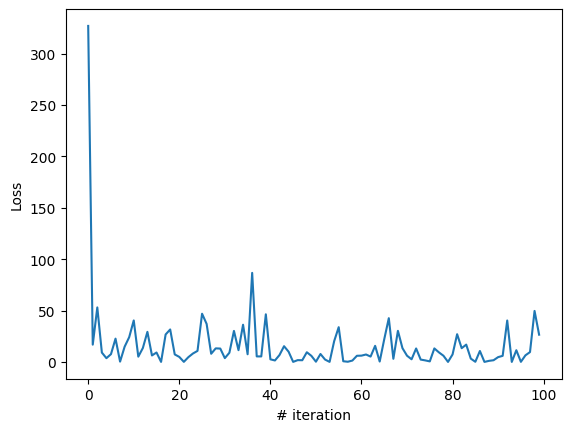

In [144]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel('# iteration')
plt.ylabel('Loss')
plt.show()

In [145]:
# Question 8:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [146]:
# Question 9:
tv = 19.2
radio = 35.9
newspaper = 51.3

X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max = 50, lr = 1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [147]:
# Question 10:
l = compute_loss_mae(y_hat = 1, y = 0.5)
print(l)

0.5


In [148]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    
    for epoch in range(epoch_max):
        
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            loss = compute_loss_mse(y, y_hat)
            loss_total += loss
            
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db
            
        w1 -= lr * dw1_total / N
        w2 -= lr * dw2_total / N
        w3 -= lr * dw3_total / N
        b -= lr * db_total / N
            
        losses.append(loss_total/N)
    return (w1, w2, w3, b, losses)
            

In [149]:
def implement_linear_regression_nsamples_mae(X_data, y_data, epoch_max = 50, lr = 1e-5):
    
    X_data = np.array(X_data)
    y_data = np.array(y_data)
    
    losses = []
    
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    
    for epoch in range(epoch_max):
        
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            loss = compute_loss_mae(y, y_hat)
            loss_total += loss
            
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db
            
        w1 -= lr * dw1_total / N
        w2 -= lr * dw2_total / N
        w3 -= lr * dw3_total / N
        b -= lr * db_total / N
            
        losses.append(loss_total/N)
    return (w1, w2, w3, b, losses)
            

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782949, 10.987623518830578, 10.877426442098113, 10.77030517743778, 10.666165788738784, 10.564917277518695, 10.466471490519933, 10.370743030217112, 10.277649168143096, 10.187109760945374, 10.099047169086274, 10.013386178104167, 9.930053922354574, 9.848979811153313, 9.770095457245784, 9.693334607529332, 9.618633075957472, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920476, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363875, 9.029340874825948, 8.97211310872959, 8.916357838686066, 8.86203115641928, 8.80

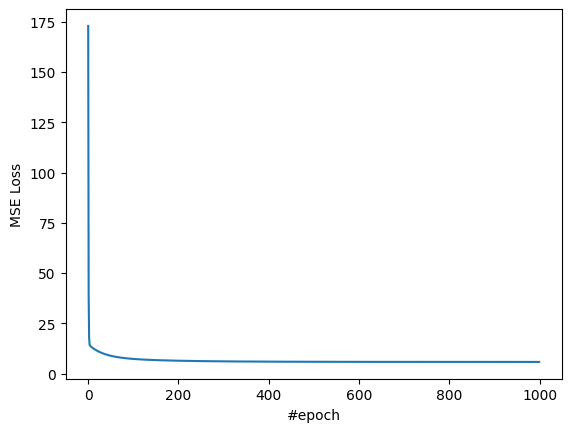

In [150]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max = 1000, lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel('#epoch')
plt.ylabel('MSE Loss')
plt.show()

In [151]:
# Question 11:
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y,
                                                               epoch_max = 1000,
                                                               lr = 1e-5)
print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


[12.537758993110772, 5.905253690937074, 3.7290201321746137, 3.280103342013847, 3.1836865214240593, 3.1504551681146706, 3.1282032310037176, 3.107834776878128, 3.0877653671823877, 3.067869077619822, 3.0482166503078565, 3.02883345816351, 3.0097268958233707, 2.990926260388694, 2.9724018229858893, 2.954147483295836, 2.936159497829541, 2.9184793882434996, 2.9013201899015386, 2.8848065446993694, 2.8692913979087806, 2.8540808729447424, 2.8391539128581824, 2.824441258695949, 2.809939593214031, 2.795661552510065, 2.781611479829696, 2.7677616004414416, 2.7541088214511316, 2.7406510256334013, 2.727970116901554, 2.7155029638904797, 2.7032118391749647, 2.691094029962382, 2.6792629854501695, 2.6676459659520204, 2.6561923391983115, 2.645064404704684, 2.6341944320960238, 2.623535606535408, 2.6130255229490116, 2.6026618964920454, 2.592442478315787, 2.5823650549969863, 2.5725241259925906, 2.5628652122287203, 2.553339917055549, 2.5439461929615637, 2.5347454167598515, 2.525816782277532, 2.517347376120849, 

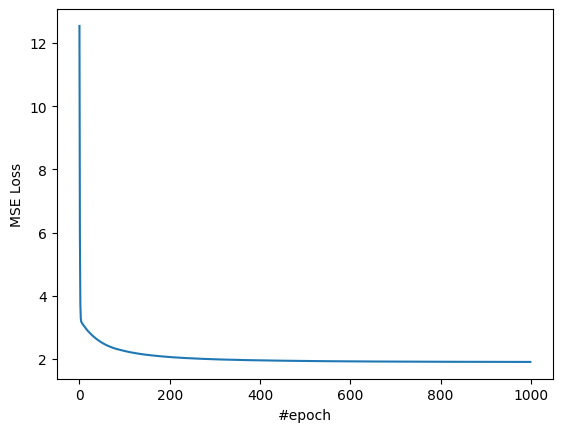

In [152]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples_mae(X, y, epoch_max = 1000, lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel('#epoch')
plt.ylabel('MSE Loss')
plt.show()

In [153]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset,
                         delimiter=',',
                         skip_header=1).tolist()
    
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)
    
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    
    return X, y

In [155]:
X, y = prepare_data('advertising.csv')

In [154]:
def initialize_params():
    w1 = random.gauss(mu = 0.0, sigma = 0.01)
    w2 = random.gauss(mu = 0.0, sigma = 0.01)
    w3 = random.gauss(mu = 0.0, sigma = 0.01)
    b = 0
    
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]
    # return w1, w2, w3, b

In [172]:
def predict(X_features, weights):
    return np.dot(np.array(X_features), np.array(weights).T)

def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

def compute_gradient_w(X_features, y, y_hat):
    return np.dot(X_features, 2*(y_hat - y))

def update_weights(weights, dl_weights, lr):
    weights = weights - lr * dl_weights
    return weights

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


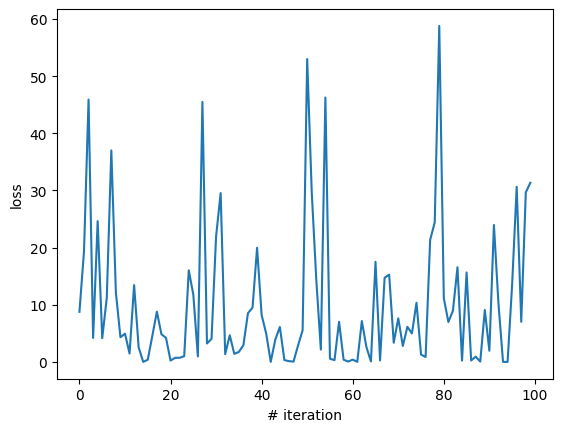

In [175]:
def implement_linear_regression(X_features, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)
    for epoch in range(epoch_max):
        print('epoch', epoch)
        for i in range(N):
            features_i = X_features[i]
            y = y_output[i]
            
            y_hat = predict(features_i, weights)
            loss = compute_loss(y, y_hat)
            dl_weights = compute_gradient_w(features_i, y, y_hat)
            weights = update_weights(weights, dl_weights, lr)
            
            losses.append(loss)
    return weights, losses

X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y)
plt.plot(L[-100:])
plt.xlabel('# iteration')
plt.ylabel('loss')
plt.show()

In [176]:
# Question 12:
X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y, epoch_max=50, lr = 1e-5)
print(L[9999])


epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
31.339223408109948
